Обработка цветного изображения

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [4]:
img = imageio.imread('astra.jpg')
img = img.astype(np.float32) / 255.
print(img.shape)

(325, 400, 3)


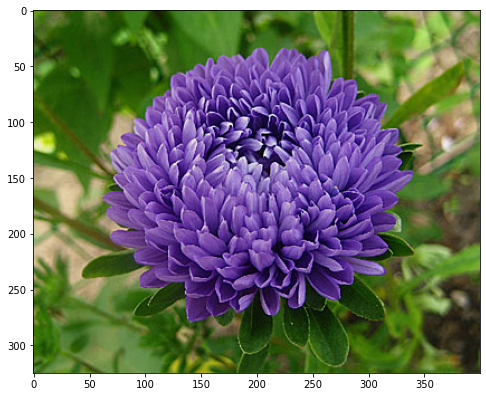

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [6]:
from skimage.color import rgb2hsv, hsv2rgb

In [7]:
img_hsv = rgb2hsv(img)

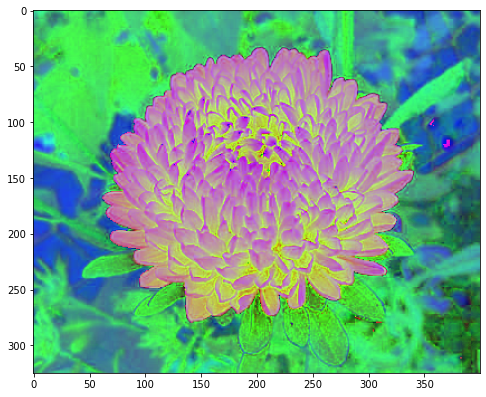

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

Линейное увеличение насышенности

In [9]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] *= 2
img_new = hsv2rgb(img_hsv_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


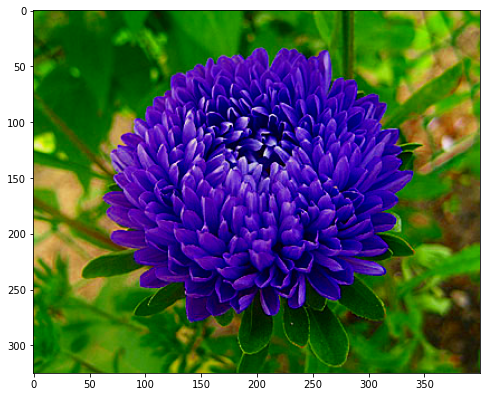

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

Размытие по Гаусу

In [11]:
import scipy.signal

In [13]:
# Gaussian blur
win_size = (11, 11)
sigma = 3    
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
  for j in range(w.shape[1]):
    w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                    -(j-w.shape[1]//2)**2 / sigma**2 / 2)
    w = w / np.sum(w)

In [14]:
out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img_new[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


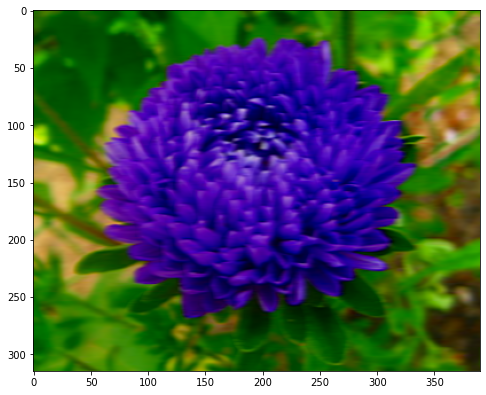

In [15]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)